<a href="https://colab.research.google.com/github/sandeepkumar-84/DBS/blob/dbs_chat_bot_research_1/Research_ChatBot_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install nltk


In [3]:
pip install newspaper3k


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 31.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 3.8 MB/s eta 0:00:00
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13539 sha256=413fd1e04591b9361162c9297d638402ee8bf9507beea87c7ac4d1a5c9fabeee
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3342 sha256=ba81b5305fa8c2316083fab581f3d96741f5732b83b260c3ed5e5f76b27b44bd
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc933

In [4]:
pip install lxml_html_clean

In [5]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.7 MB/s eta 0:00:00


In [6]:
import pandas as pd

In [7]:
from newspaper import Article
import random
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [8]:
nltk.download('punkt',quiet=True)

True

In [11]:
#extrat text from multiple pdfs and storing text into different variables
import PyPDF2
import os

def extract_text_from_pdf_multiple(file_path):
    """
    Extract text from a given PDF file.
    """
    text = ""
    with open(file_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        for page in pdf_reader.pages:
            text += page.extract_text()
    return text

# Example: Extract text from all PDFs in a folder
pdf_folder = r"/content/Research"
pdf_texts = []

for pdf_file in os.listdir(pdf_folder):
    if pdf_file.endswith('.pdf'):
        text = extract_text_from_pdf_multiple(os.path.join(pdf_folder, pdf_file))
        pdf_texts.append({"file_name": pdf_file, "content": text})


Intent Classification

In [12]:
import pandas as pd

# Example labeled data
pdf_dataset = pd.DataFrame(pdf_texts)
pdf_dataset['intent'] = pdf_dataset['file_name'].apply(
    lambda x: "Admissions" if "admission" in x.lower() else
              "Admissions" if "application" in x.lower() else
              "Courses" if "course" in x.lower() else
              "Courses" if "programmes" in x.lower() else
              "Courses" if "diploma" in x.lower() else
              "Courses" if "qualification" in x.lower() else
              "Scholarships" if "scholarship" in x.lower() else
              "Placement" if "placement" in x.lower() else
              "Fee" if "fee" in x.lower() else
              "Applicants" if "applicant" in x.lower() else
              "Programmes" if "programme" in x.lower() else
              "Recognition" if "recognition" in x.lower() else
              "Library" if "library" in x.lower() else
              "Quality" if "quality" in x.lower() else
              "Psychological" if "psychological" in x.lower() else
              "Events"
)


In [15]:
pdf_dataset

,file_name,content,intent
0,1-Dbs-postgraduate-programmes.pdf,Postgraduate \nProgrammes\nDublin Business Sch...,Courses
1,2-FAQs-DBS.pdf,StudentFAQGuideDublinBusinessSchoolLiveDocumen...,Events


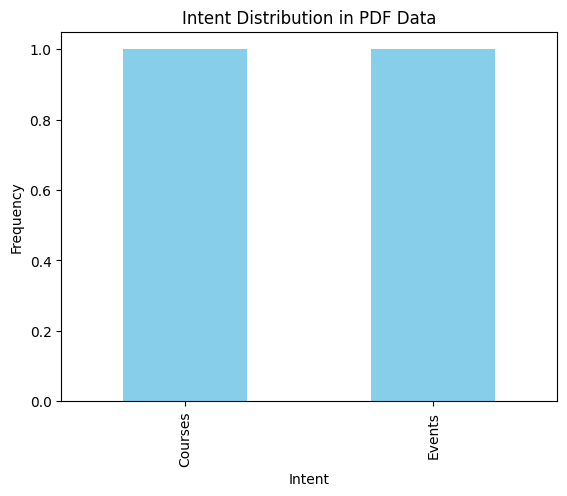

In [14]:
import matplotlib.pyplot as plt

pdf_dataset['intent'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Intent Distribution in PDF Data")
plt.xlabel("Intent")
plt.ylabel("Frequency")
plt.show()